In [103]:
import os

In [104]:
os.getcwd()

'C:\\Users\\Admin\\Desktop\\Houses'

In [105]:
os.chdir('C:\\Users\\Admin\\Desktop\\Houses')

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
%matplotlib inline

In [107]:
train=pd.read_csv('train.csv',sep=',')

In [108]:
train.shape

(1460, 81)

In [109]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [110]:
train.set_index(train['Id'],inplace=True,drop=True)

In [111]:
train.drop(['Id'],axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [112]:
#Description all variables
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [113]:
def miss_data(df):
    x = ['column_name','missing_data', 'missing_in_percentage','dup','dup_perc']
    missing_data = pd.DataFrame(columns=x)
    columns = df.columns
    for col in columns:
        icolumn_name = col
        imissing_data = df[col].isnull().sum()
        imissing_in_percentage = round((df[col].isnull().sum()/df[col].shape[0])*100,3)
        idup=df.duplicated(keep='first').astype(int).sum(axis=0)
        dup_per=round(100*(idup/df[col].shape[0]))
        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_data, imissing_in_percentage,idup,dup_per]
        missing_data.sort_values(by=['missing_in_percentage'],ascending=False, inplace=True)
    print(missing_data)

In [114]:
miss_data(train)

    column_name missing_data  missing_in_percentage dup  dup_perc
72       PoolQC         1453                 99.521   0       0.0
74  MiscFeature         1406                 96.301   0       0.0
6         Alley         1369                 93.767   0       0.0
73        Fence         1179                 80.753   0       0.0
57  FireplaceQu          690                 47.260   0       0.0
..          ...          ...                    ...  ..       ...
9     Utilities            0                  0.000   0       0.0
53  KitchenQual            0                  0.000   0       0.0
76       MoSold            0                  0.000   0       0.0
78     SaleType            0                  0.000   0       0.0
80    SalePrice            0                  0.000   0       0.0

[81 rows x 5 columns]


In [115]:
#Have any NaN
train.columns[(train.isnull().sum()/train.shape[0])>0].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [116]:
#Have MORE than 75% NAN
train[train.columns[(train.isnull().sum()/train.shape[0])>0.75]]

,Alley,PoolQC,Fence,MiscFeature
Id,,,,
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
...,...,...,...,...
1456,NaN,NaN,NaN,NaN
1457,NaN,NaN,MnPrv,NaN
1458,NaN,NaN,GdPrv,Shed


In [117]:
#Deletion
list=train[train.columns[(train.isnull().sum()/train.shape[0])>0.75]].columns.tolist()
train.drop(columns=list,inplace=True)

In [118]:
#Do not have any NaN
train.columns[(train.isnull().sum()/train.shape[0])==0].tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'SalePrice']

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


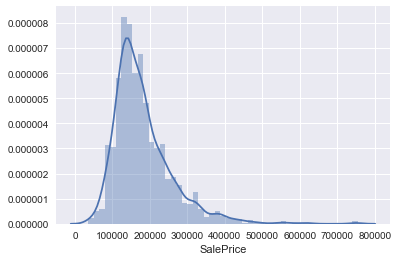

In [119]:
sns.distplot(train['SalePrice'])


In [120]:
round(train.SalePrice.mean())

180921

In [121]:
round(train.SalePrice.std())

79443

In [122]:
round(train.SalePrice.max())

755000

In [123]:
round(train.SalePrice.min())

34900

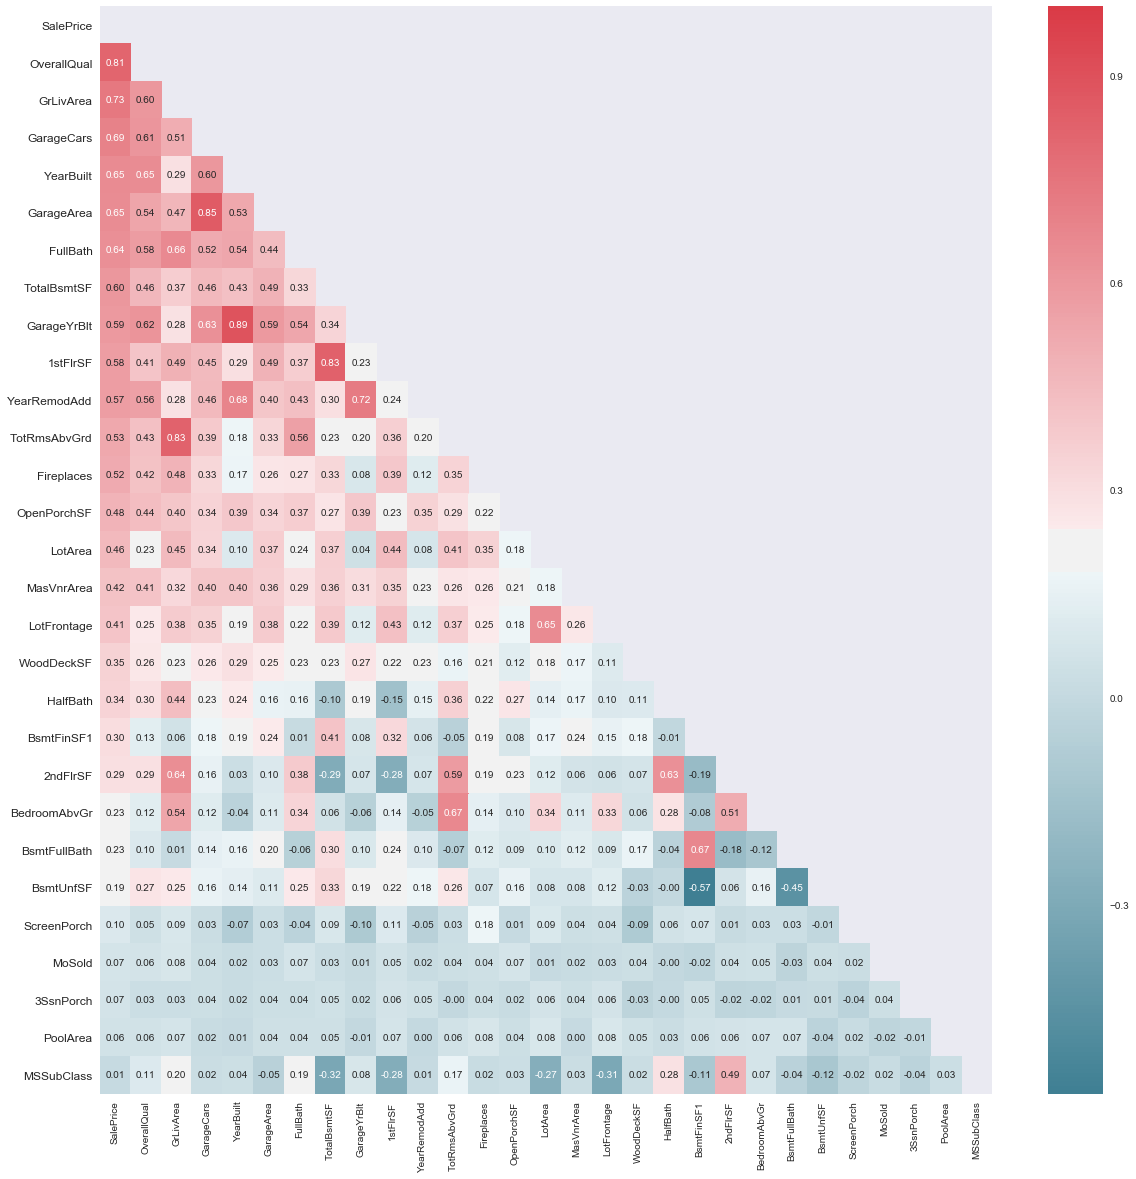

In [124]:
#CORRELATION ANALYSIS#
#CON ESTE CÓDIGO OBTENEMOS EL 100% DE LA MATRIZ DE CORRELACIONES, ORDENADA POR LA CORRELACIÓN CON VBLE PPAL.

#Filtramos aquellos registros que tengan SalePrice
corr = train[train.SalePrice>1].corr(method='spearman')

#Correlaciones mayores que un umbral .5 en este caso
top_corr_cols = corr[abs((corr.SalePrice)>=0)].SalePrice.sort_values(ascending=False).keys()

#Filtramos corr, que tiene toda la matriz de correlaciones, por aquellas que son mayores del umbral, 
#al hacerlo con loc no da nulls (bingo!)
top_corr = corr.loc[top_corr_cols, top_corr_cols]

#Creamos una matriz de ceros de las mismas dimensiones que la anterior y nos quedamos con el triángulo superior
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True

#Pintar
plt.figure(figsize=(20, 20))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12,rotation=0)
plt.show()
del corr, dropSelf, top_corr

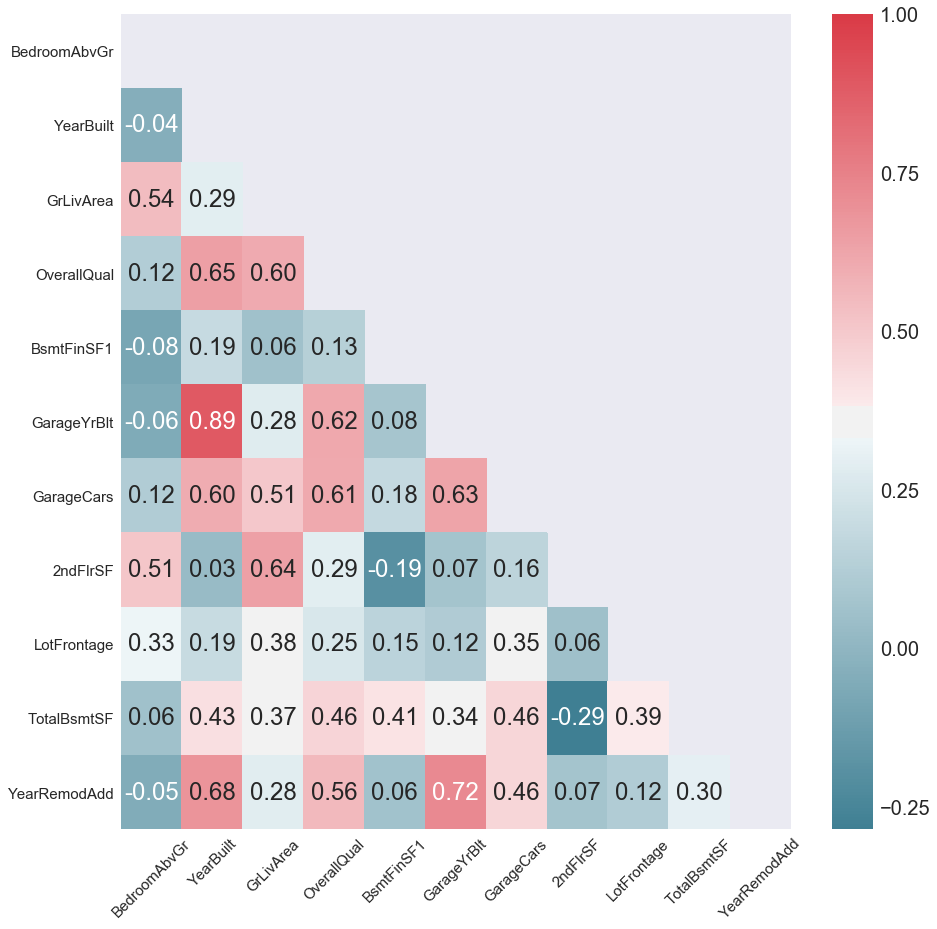

In [125]:
#CORRELATION ANALYSIS#
#HIGHLY CORRELATED FACTORS

#Filtramos aquellos registros que tengan SalePrice
corr = train[train.SalePrice>1].corr(method='spearman')
corr.drop(['SalePrice'],axis=1,inplace=True)
corr.drop(['SalePrice'],axis=0,inplace=True)
#Correlaciones mayores que un umbral .5 en este caso
matriz = corr[corr.isnull().any()==False]
#top_corr_cols = matriz[abs((matriz)>=0.5)]

listOfFeatures = [i for i in matriz]
setOfDroppedFeatures = set() 
for i in range(len(listOfFeatures)) :
    for j in range(i+1,len(listOfFeatures)): #Avoid repetitions 
        feature1=listOfFeatures[i]
        feature2=listOfFeatures[j]
        if abs(matriz[feature1][feature2])>0.60:
            setOfDroppedFeatures.add(feature1) #Add one of them to the set



#Filtramos corr, que tiene toda la matriz de correlaciones, por aquellas que son mayores del umbral, 
#al hacerlo con loc no da nulls (bingo!)
top_corr = corr.loc[setOfDroppedFeatures, setOfDroppedFeatures]

#Creamos una matriz de ceros de las mismas dimensiones que la anterior y nos quedamos con el triángulo superior
eliminamos = np.zeros_like(top_corr)
eliminamos[np.triu_indices_from(eliminamos)] = True

#Pintar
plt.figure(figsize=(15, 15))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=eliminamos)
sns.set(font_scale=1.5)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15,rotation=0)
plt.show()
del corr, eliminamos, top_corr


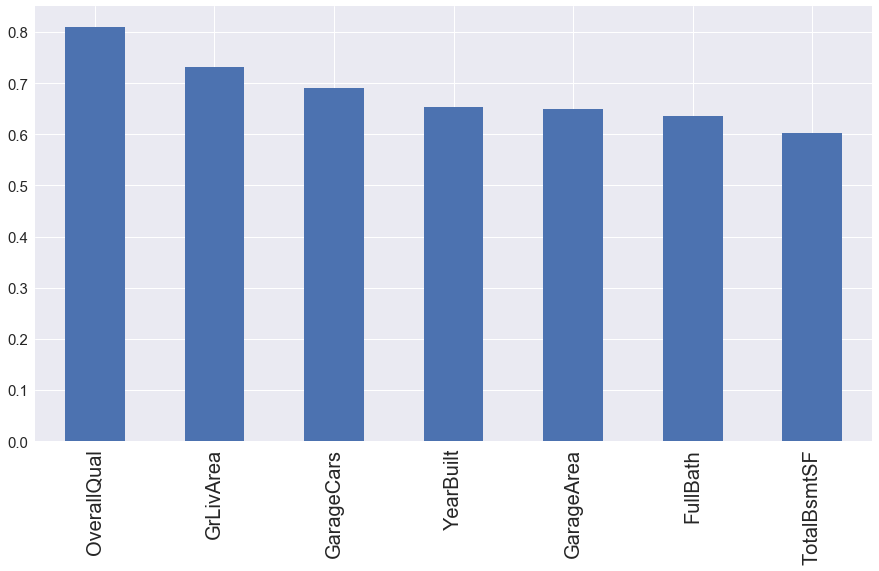

In [126]:
#ZOOM TO THE VARIABLES MOST CORRELATED WITH SALE PRICE
corr=abs(train.corr(method='spearman'))
correlaciones=corr[corr['SalePrice'].between(0.6,0.99)].SalePrice.sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.xticks(fontsize=20)
correlaciones.plot.bar()
plt.show();

In [127]:
train["Total_house_area"] = train["1stFlrSF"] + train["2ndFlrSF"] + train["TotalBsmtSF"]+train["GarageArea"]
train["Total_SF"]  = train["TotalBsmtSF"] + train["GrLivArea"]


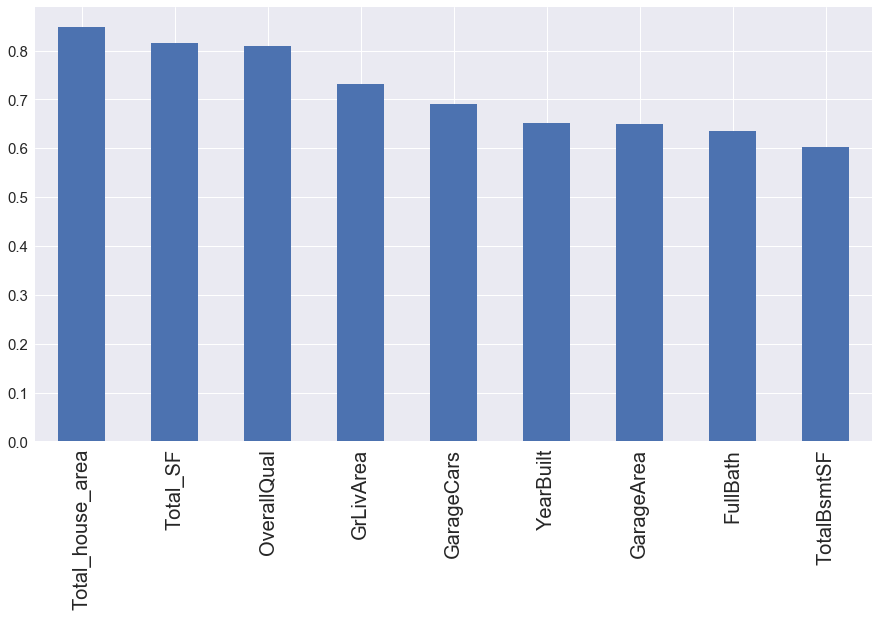

In [128]:
#ZOOM TO THE VARIABLES MOST CORRELATED WITH SALE PRICE
corr=abs(train.corr(method='spearman'))
correlaciones=corr[corr['SalePrice'].between(0.6,0.99)].SalePrice.sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.xticks(fontsize=20)
correlaciones.plot.bar()
plt.show();

In [129]:
train.drop(['Total_SF','GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1,inplace=True)


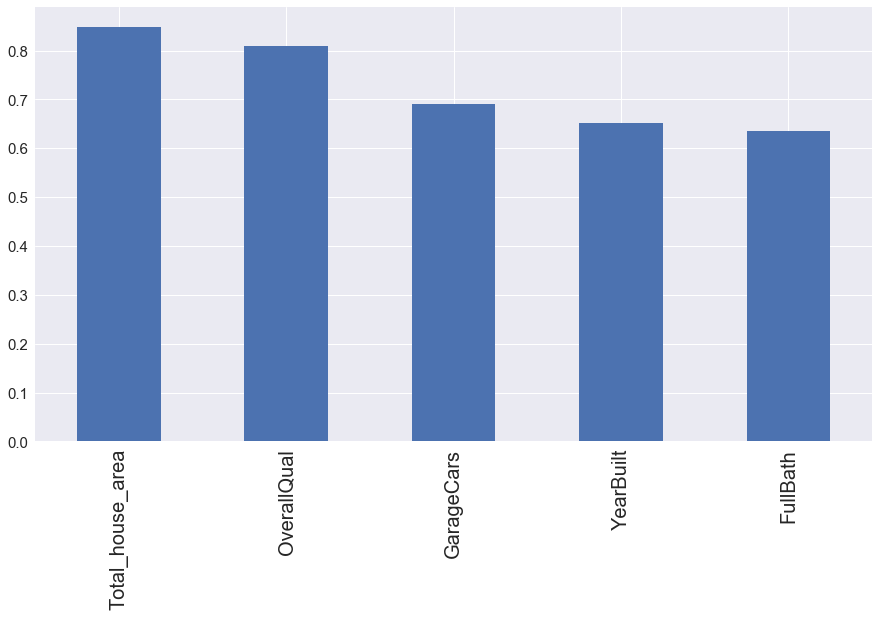

In [130]:
#ZOOM TO THE VARIABLES MOST CORRELATED WITH SALE PRICE
corr=abs(train.corr(method='spearman'))
correlaciones=corr[corr['SalePrice'].between(0.6,0.99)].SalePrice.sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.xticks(fontsize=20)
correlaciones.plot.bar()
plt.show();

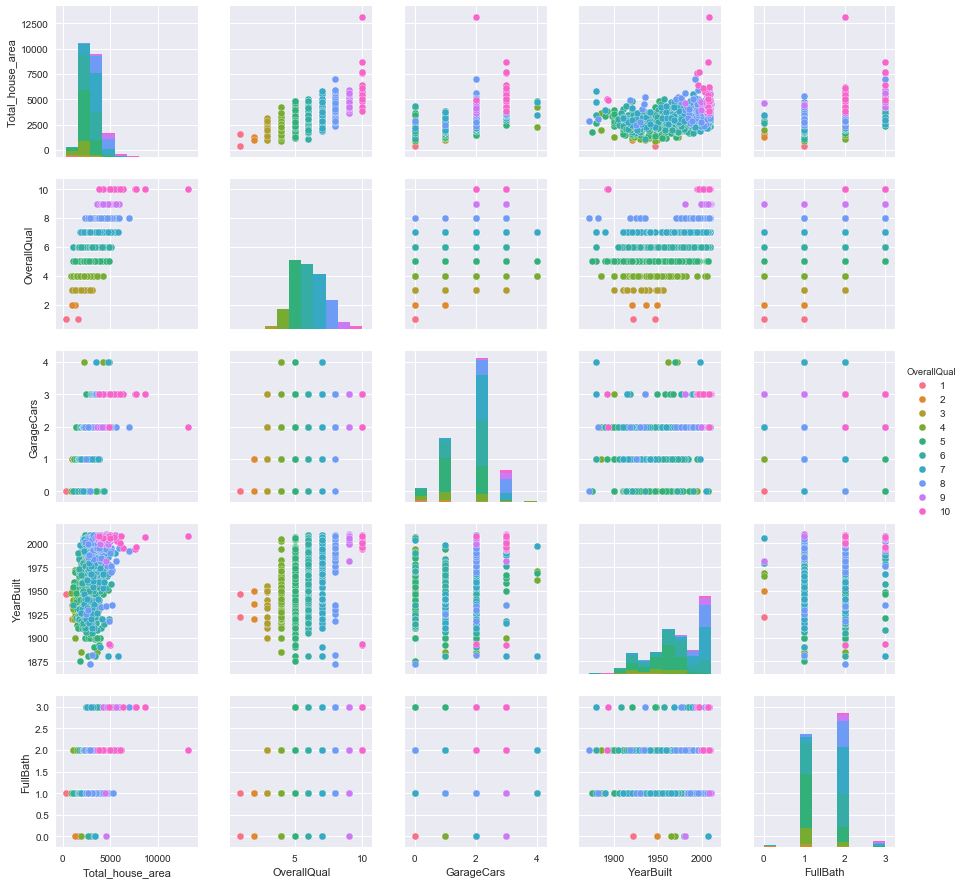

<Figure size 1440x1440 with 0 Axes>

In [131]:
#scatterplot
sns.set()
cols = correlaciones.index.tolist()
sns.pairplot(train[cols],hue='OverallQual')
plt.figure(figsize=(20, 20))
plt.show()

In [132]:
#X and y
train.dropna(subset=(['SalePrice']),inplace=True)
y=train['SalePrice']             
X=train.drop(columns='SalePrice')

In [133]:
X.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSo

In [134]:
zmean=X.select_dtypes(include=['float64','int64']).apply(lambda x: x.fillna(x.mean()),axis=0)
zmean.select_dtypes(include=['float64','int64']).head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Total_house_area
Id,,,,,,,,,,,,,,,,,,,,,
1,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,3114
2,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,2984
3,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,3314
4,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,3115
5,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,4179


In [135]:
fill_mode = lambda col: col.fillna(col.mode())
an=X.select_dtypes(include='object').apply(fill_mode, axis=0)
an.select_dtypes(include='object').head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [136]:
#Dummy the categorical
def total(an,num):    
    dummies=pd.get_dummies(an)
    X=pd.concat([num,dummies],axis=1)
    return X
  

In [137]:
X=total(an,zmean)
miss_data(X)

               column_name missing_data  missing_in_percentage dup  dup_perc
0                       Id            0                    0.0   0       0.0
4              OverallQual            0                    0.0   0       0.0
3                  LotArea            0                    0.0   0       0.0
41            LotShape_IR2            0                    0.0   0       0.0
6                YearBuilt            0                    0.0   0       0.0
..                     ...          ...                    ...  ..       ...
255           PavedDrive_P            0                    0.0   0       0.0
261         SaleType_ConLI            0                    0.0   0       0.0
263           SaleType_New            0                    0.0   0       0.0
269   SaleCondition_Family            0                    0.0   0       0.0
271  SaleCondition_Partial            0                    0.0   0       0.0

[272 rows x 5 columns]


In [138]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model,X,y):
    scores = cross_val_score(model,
                             X,
                             y,
                             cv=5,
                             scoring='r2')
    
    return np.mean(scores)
    #print('STD: ', np.std(scores))
    #print('\n')

In [139]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.figure(figsize=(20,12))
        plt.xticks(fontsize=10)
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=3,fancybox=True, framealpha=1, shadow=True, borderpad=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

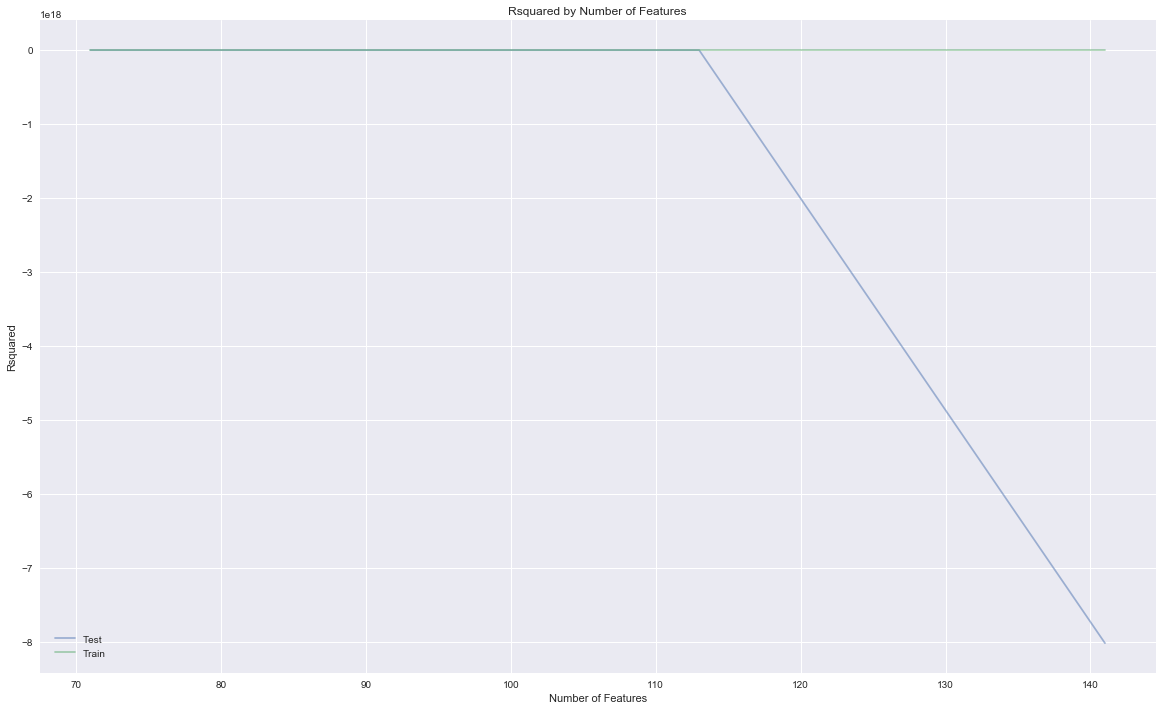

In [140]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [500,250,100,50]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [141]:
# Cell for your computations to answer the next question
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2


113
0.8474122446673715
0.8604924826456177


In [142]:
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet,ElasticNetCV
# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train)


alpha = [0.5, 1, 10, 100, 1000]
l1_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid_ENet = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2',cv=10)
grid_ENet_result = grid_ENet.fit(X_train, y_train)
print('Best Score_ENet: ', grid_ENet_result.best_score_)
print('Best Params_ENet: ', grid_ENet_result.best_params_)

lasso_params={'alpha' : [0.5, 1, 10, 100, 1000]}
grid_lasso = GridSearchCV(estimator=Lasso(), param_grid=lasso_params, scoring='r2',cv=10)
grid_lasso_result = grid_lasso.fit(X_train, y_train)
print('Best Score_Lasso: ', grid_lasso_result.best_score_)
print('Best Params_Lasso: ', grid_lasso_result.best_params_)

ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
grid_ridge = GridSearchCV(estimator=Ridge(), param_grid=ridge_params, scoring='r2',cv=10)
grid_ridge_result = grid_ridge.fit(X_train, y_train)
print('Best Score_Ridge: ', grid_ridge_result.best_score_)
print('Best Params_Ridge: ', grid_ridge_result.best_params_)


Best Score_ENet:  0.7860423809174273
Best Params_ENet:  {'alpha': 0.5, 'l1_ratio': 0.9}
Best Score_Lasso:  0.7842028047631027
Best Params_Lasso:  {'alpha': 100}
Best Score_Ridge:  0.7733980457949667
Best Params_Ridge:  {'alpha': 200}


In [143]:
def model_eval(model):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)    
    #print('Train r2 score: ',get_cv_scores(model,X_train,y_train))
    #print('Test r2 score: ', get_cv_scores(model,X_test,y_test))
    print('Train r2 score: ', r2_score(y_train_pred, y_train))
    print('Test r2 score: ', r2_score(y_test, y_pred))
    train_mse = mean_squared_error(y_train_pred, y_train)
    test_mse = mean_squared_error(y_pred, y_test)
    train_mse = mean_squared_error(y_train_pred, y_train)
    test_mse = mean_squared_error(y_pred, y_test)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    print('Train RMSE: %.4f' % train_rmse)
    print('Test RMSE: %.4f' % test_rmse)

In [144]:
model_eval(grid_ENet_result.best_estimator_)

Train r2 score:  0.8130517942257738
Test r2 score:  0.8551252050444447
Train RMSE: 30323.4671
Test RMSE: 31795.4384


In [145]:
model_eval(lm_model)

Train r2 score:  0.8378747982487179
Test r2 score:  0.8474122446673715
Train RMSE: 28976.4822
Test RMSE: 32630.8391


In [146]:
model_eval(grid_ridge_result.best_estimator_)

Train r2 score:  0.7819768741623685
Test r2 score:  0.8488359833426821
Train RMSE: 32124.9139
Test RMSE: 32478.2494


In [147]:
model_eval(grid_lasso_result.best_estimator_)

Train r2 score:  0.8291701096989055
Test r2 score:  0.850722150568923
Train RMSE: 29447.7859
Test RMSE: 32274.9877


113 features, reduction of 0.00%


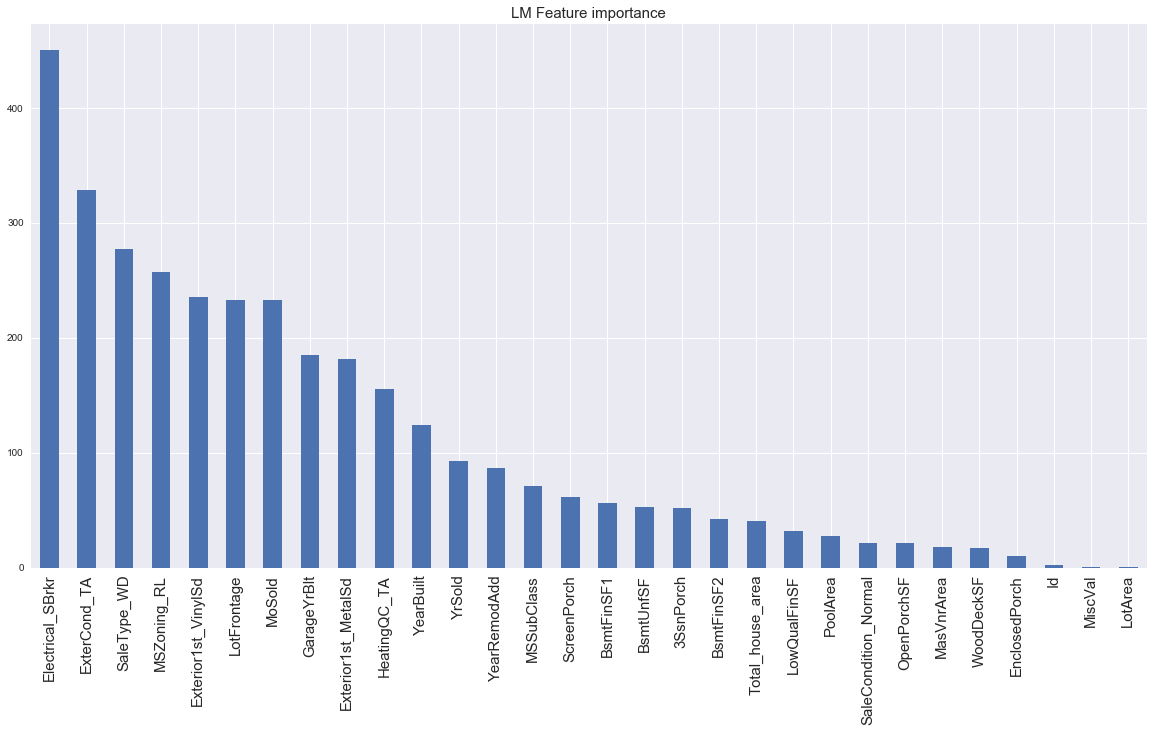

In [148]:
#LM Feature importance
feature_importance = pd.Series(index = X_train.columns, data = np.abs(lm_model.coef_))
n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance.sort_values(ascending=False).tail(30).plot(kind = 'bar', figsize = (20,10))
plt.xticks(fontsize=15)
plt.title('LM Feature importance',fontsize=15);

113 features, reduction of 0.00%


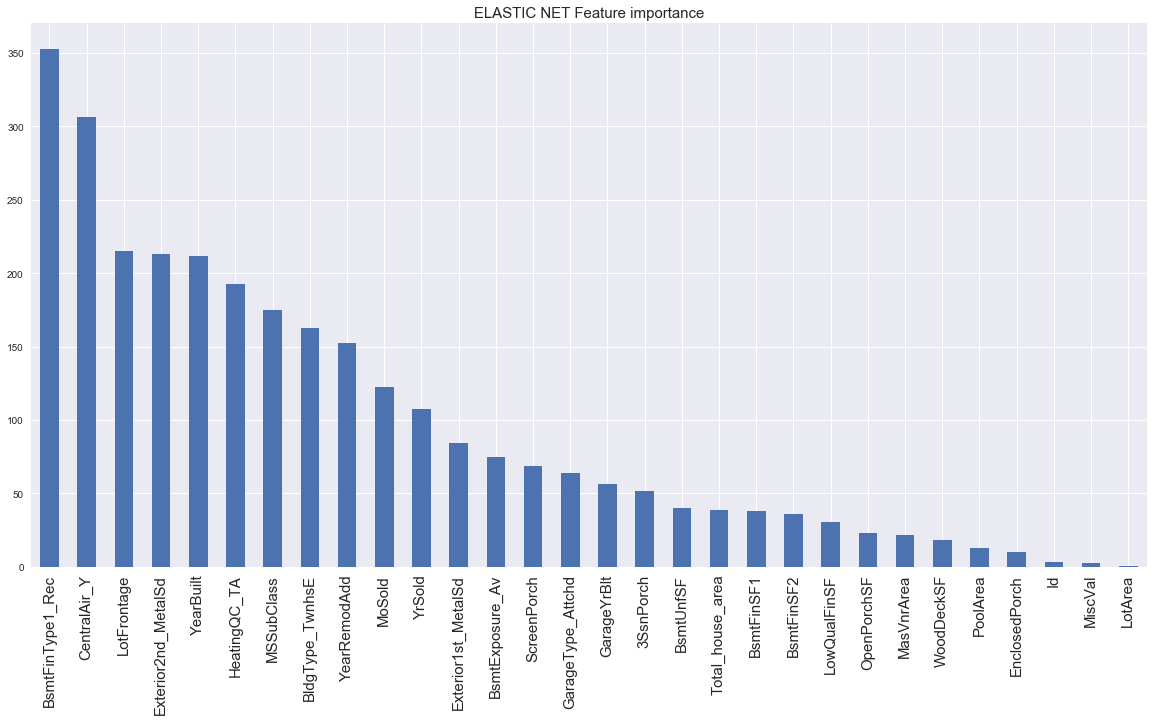

In [149]:
#ELASTIC NET Feature importance
feature_importance = pd.Series(index = X_train.columns, data = np.abs(grid_ENet_result.best_estimator_.coef_))
n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance.sort_values(ascending=False).tail(30).plot(kind = 'bar', figsize = (20,10))
plt.xticks(fontsize=15)
plt.title('ELASTIC NET Feature importance',fontsize=15);

113 features, reduction of 0.00%


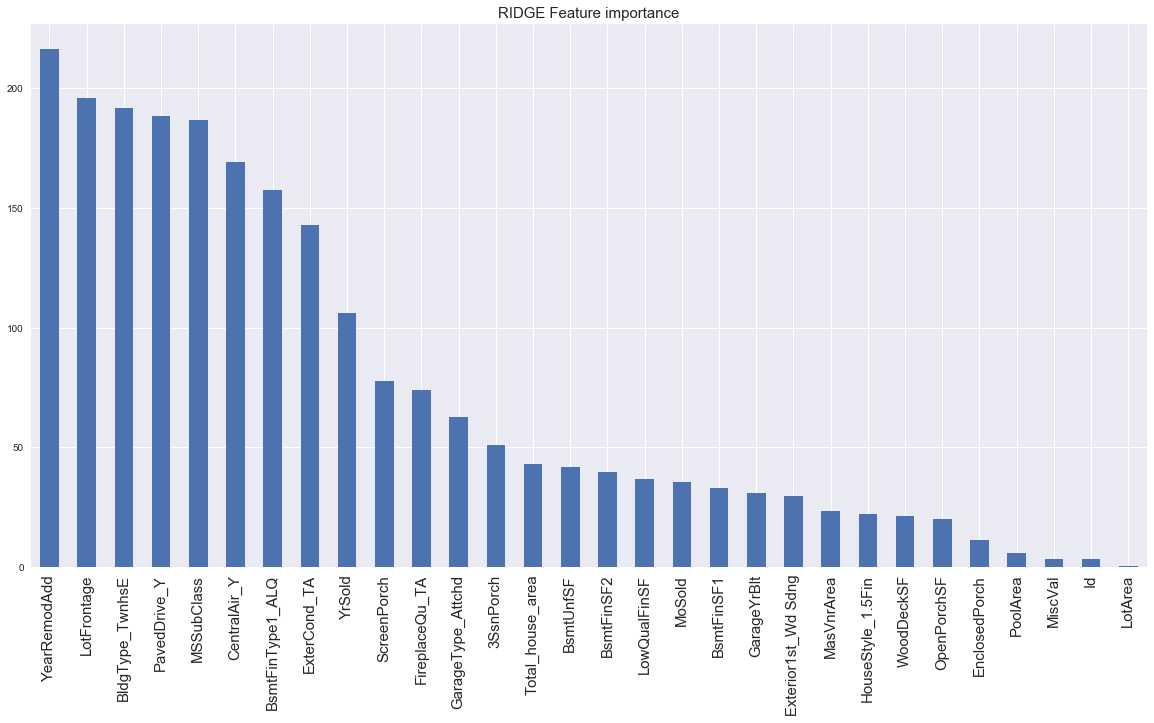

In [150]:
#RIDGE Feature importance
feature_importance = pd.Series(index = X_train.columns, data = np.abs(grid_ridge_result.best_estimator_.coef_))
n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance.sort_values(ascending=False).tail(30).plot(kind = 'bar', figsize = (20,10))
plt.xticks(fontsize=15)
plt.title('RIDGE Feature importance',fontsize=15);

89 features, reduction of 21.24%


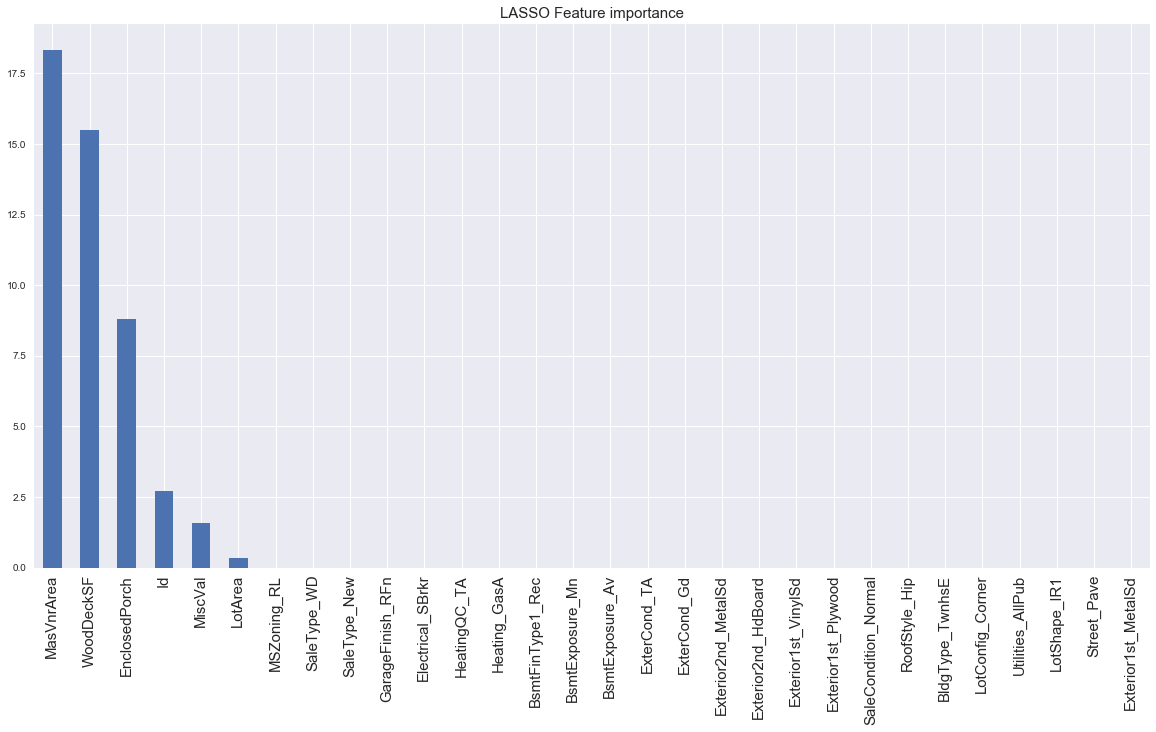

In [151]:
#LASSO Feature importance
feature_importance = pd.Series(index = X_train.columns, data = np.abs(grid_lasso_result.best_estimator_.coef_))
n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance.sort_values(ascending=False).tail(30).plot(kind = 'bar', figsize = (20,10))
plt.xticks(fontsize=15)
plt.title('LASSO Feature importance',fontsize=15);